In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier 

from sklearn.preprocessing import StandardScaler


Attribute Information: (classes: edible=e, poisonous=p)

    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

    bruises: bruises=t,no=f

    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

    gill-attachment: attached=a,descending=d,free=f,notched=n

    gill-spacing: close=c,crowded=w,distant=d

    gill-size: broad=b,narrow=n

    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

    stalk-shape: enlarging=e,tapering=t

    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    veil-type: partial=p,universal=u

    veil-color: brown=n,orange=o,white=w,yellow=y

    ring-number: none=n,one=o,two=t

    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [21]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [22]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [23]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [24]:
print(df['odor'].unique())
print(df['gill-size'].unique())
print(df['spore-print-color'].unique())
print(df['ring-type'].unique())
print(df['gill-color'].unique())
print(df['population'].unique())
print(df['bruises'].unique())

['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['n' 'b']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['s' 'n' 'a' 'v' 'y' 'c']
['t' 'f']


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

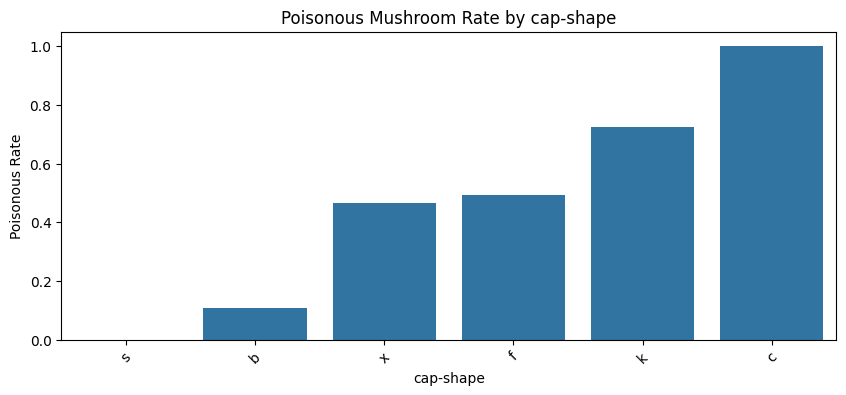

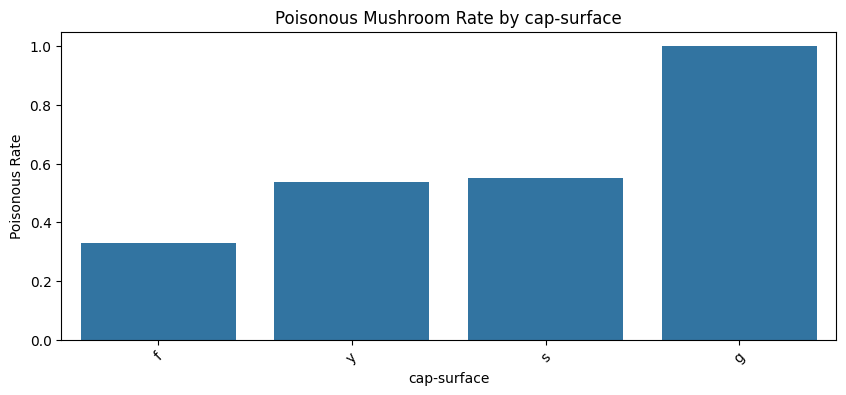

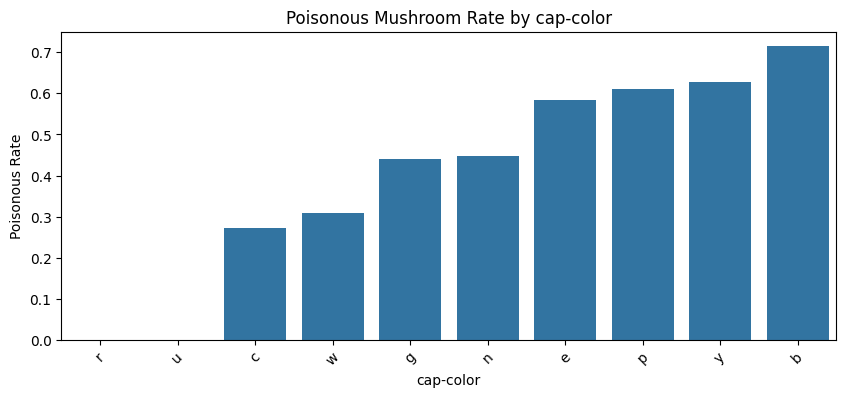

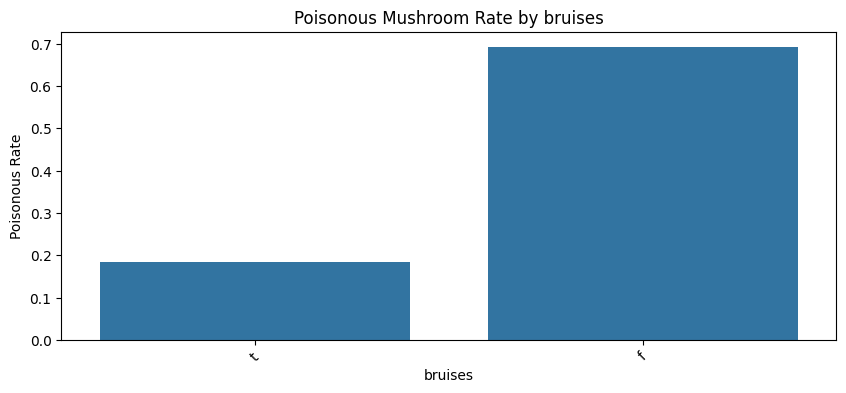

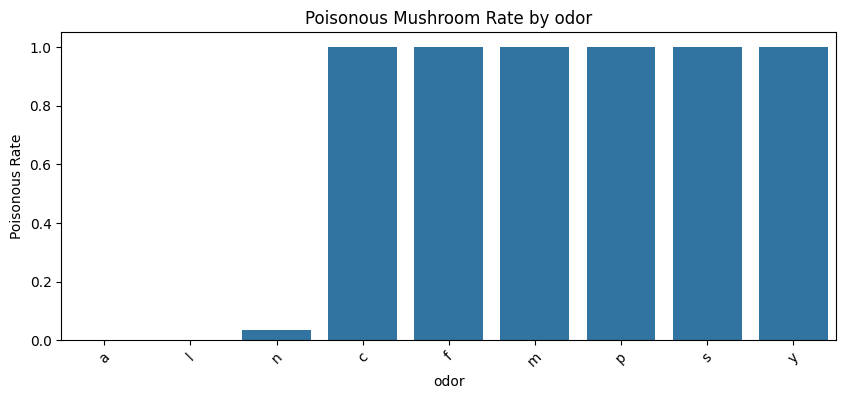

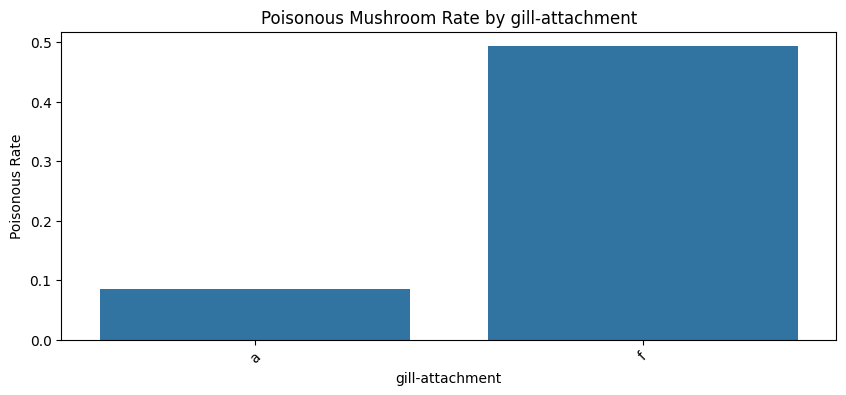

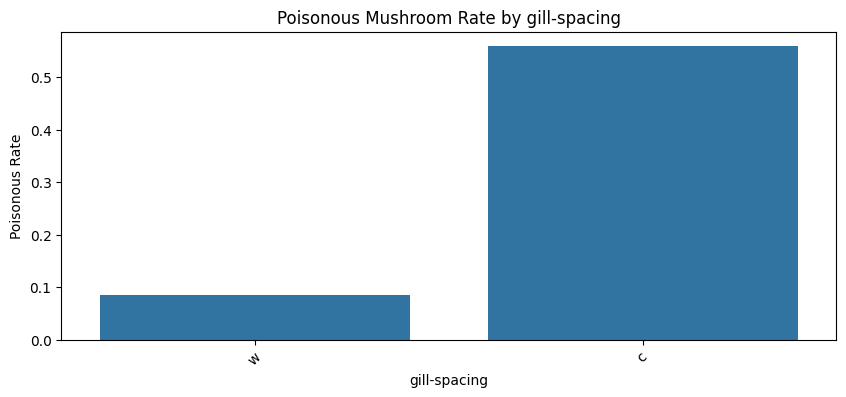

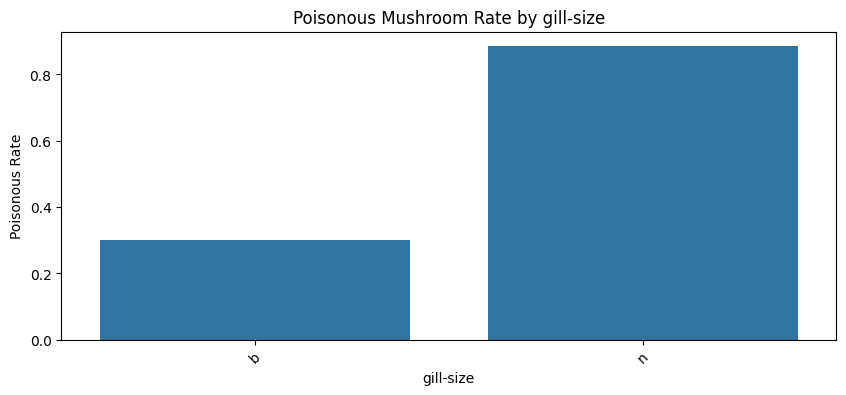

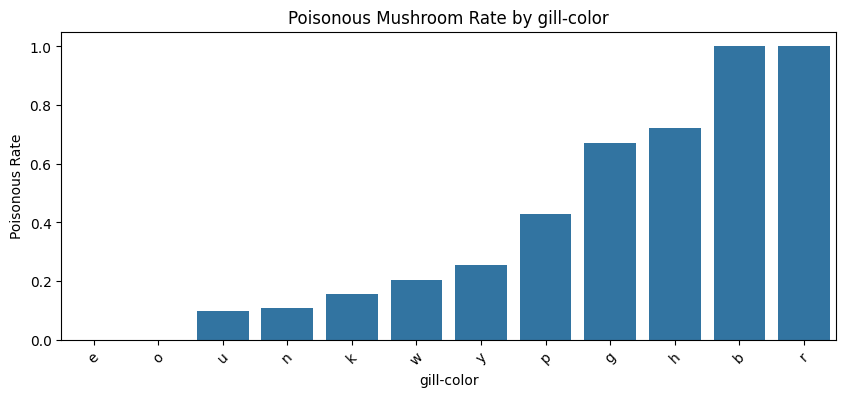

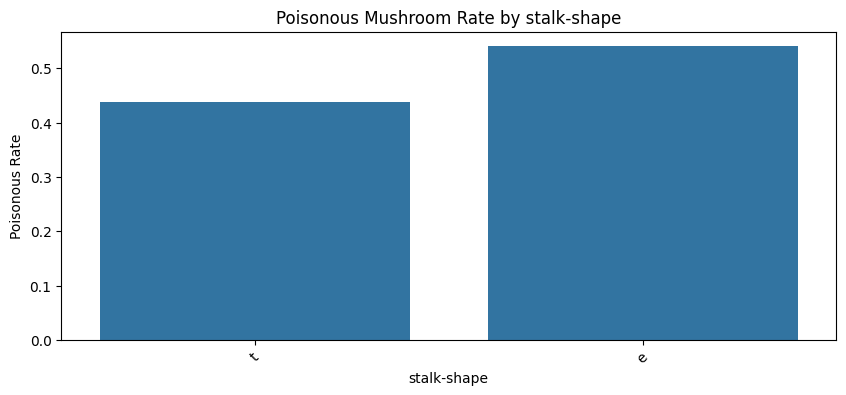

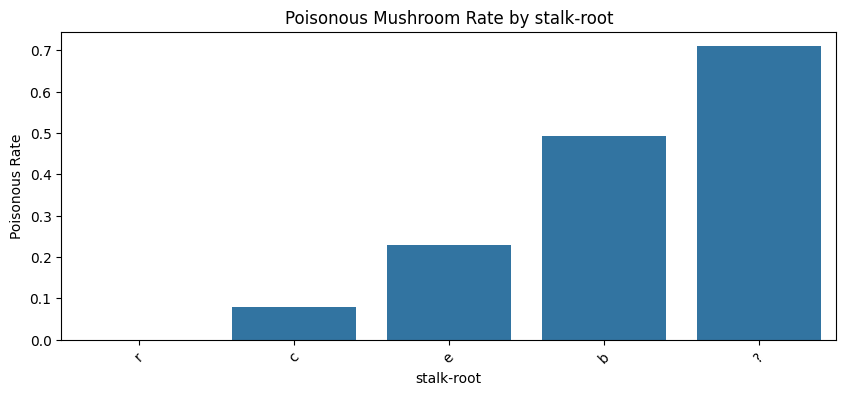

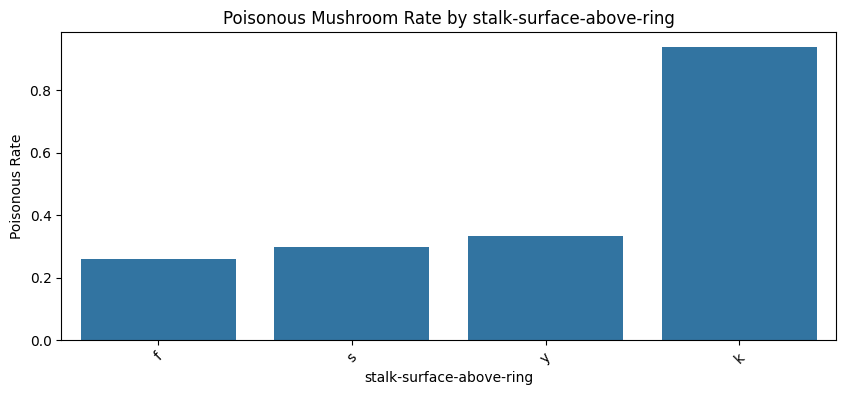

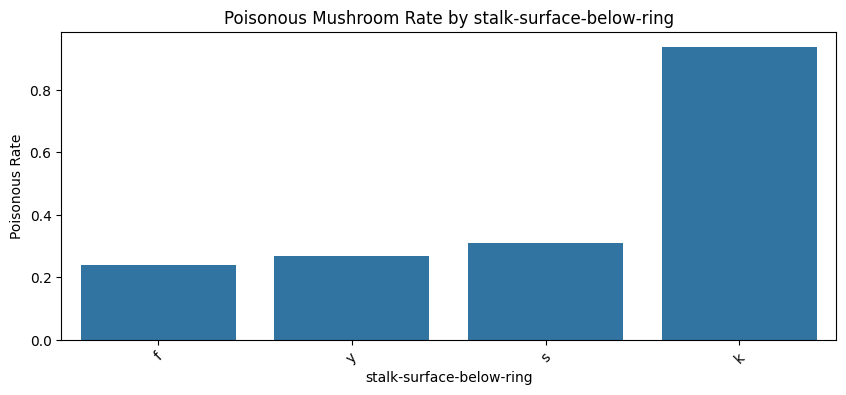

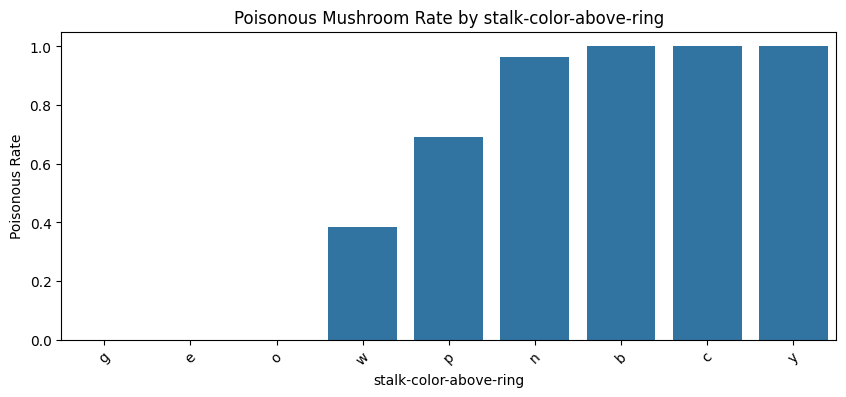

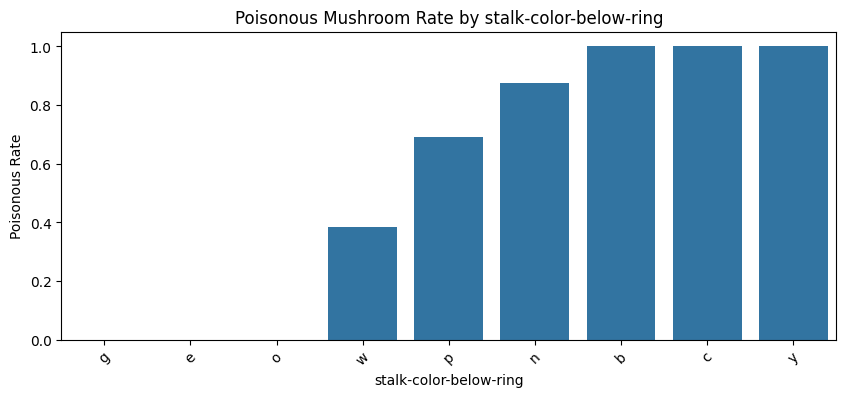

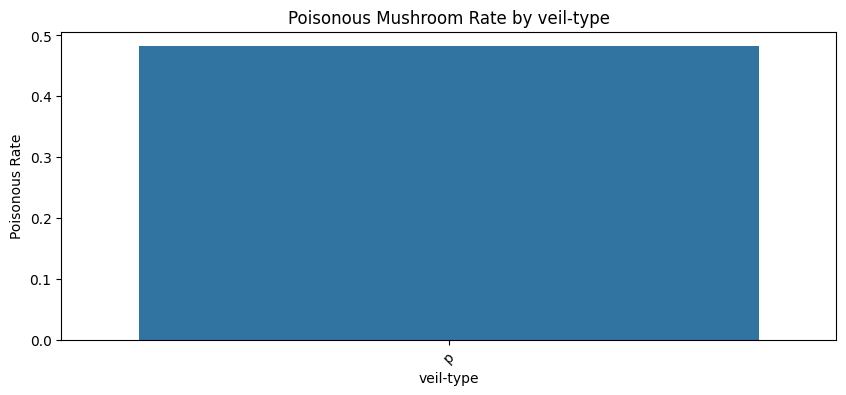

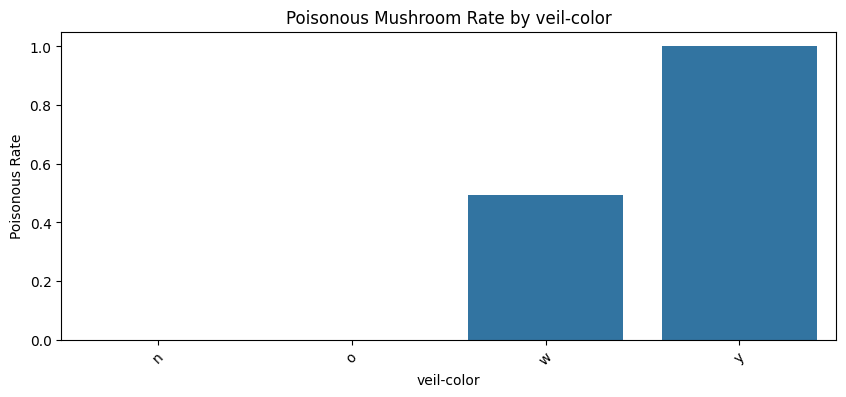

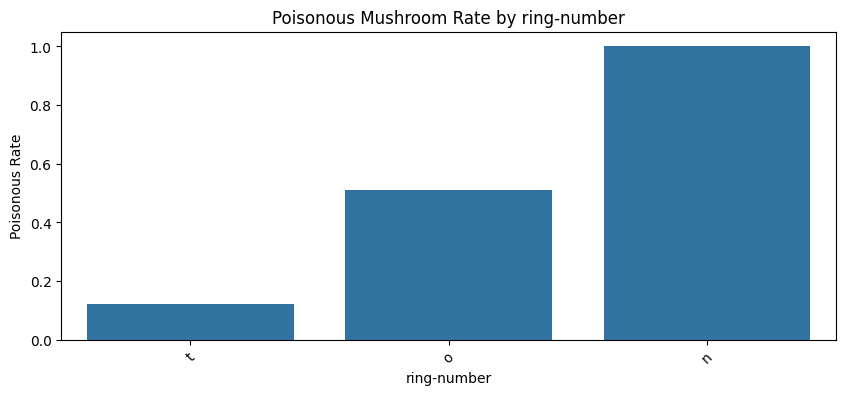

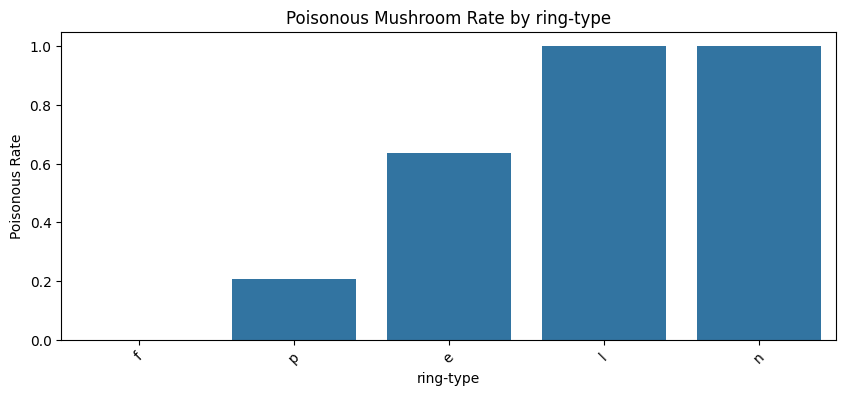

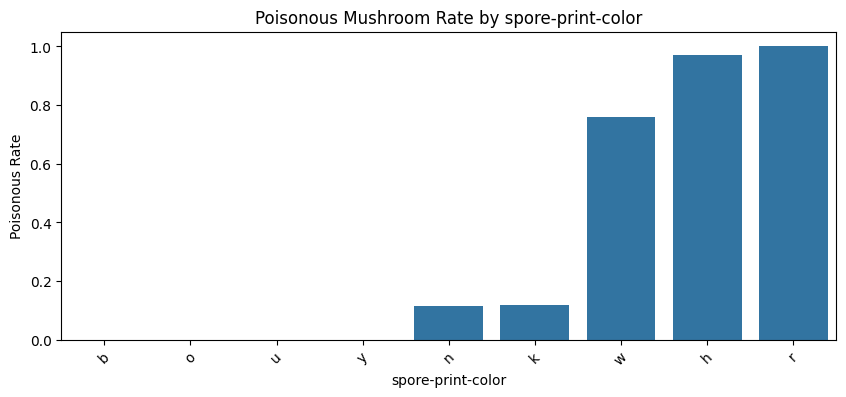

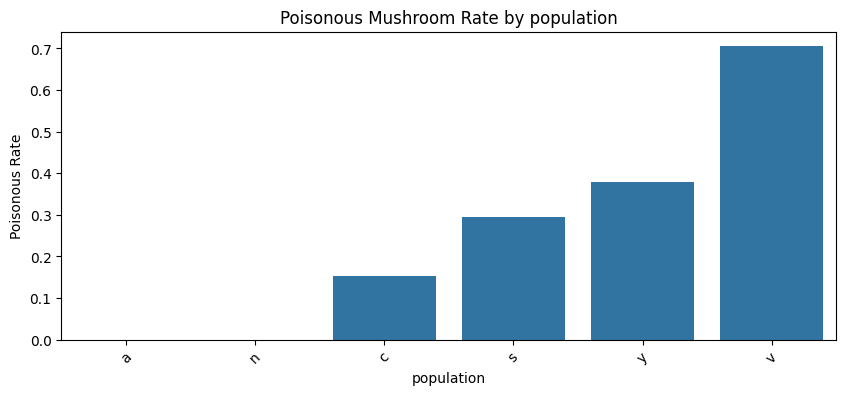

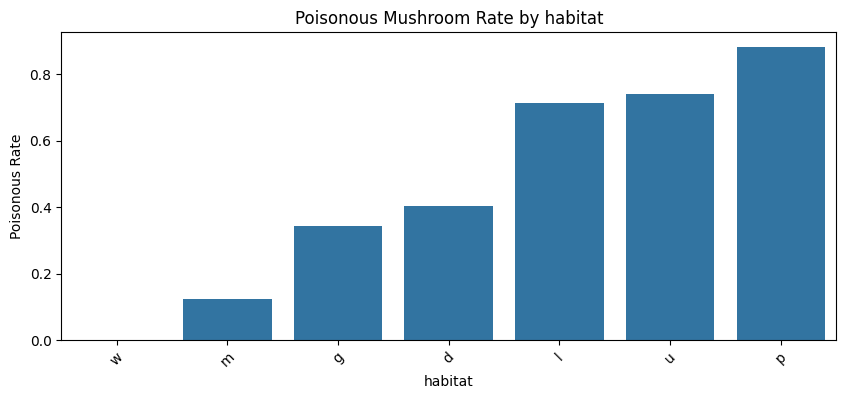

In [26]:
# for col in df:
#     plt.figure(figsize=(10,4))
#     rate = df.groupby(col)['class'].mean().sort_values()
#     sns.barplot(x=rate.index, y=rate.values)
#     plt.title(f"Poisonous Mushroom Rate {col}")
#     plt.ylabel("Poisonous Rate")
#     plt.xticks(rotation=45)
#     plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Ubah class ke angka
df["class"] = df["class"].map({"e": 0, "p": 1})

for col in df.columns:
    if col == "class":
        continue

    plt.figure(figsize=(10,4))
    rate = df.groupby(col)['class'].mean().sort_values()

    sns.barplot(x=rate.index, y=rate.values)
    plt.title(f"Poisonous Mushroom Rate by {col}")
    plt.ylabel("Poisonous Rate")
    plt.xticks(rotation=45)
    plt.show()


In [27]:
from sklearn.preprocessing import LabelEncoder

for col in df:
    df[col] = LabelEncoder().fit_transform(df[col])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [28]:
x = df.drop('class', axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)


RandomForestClassifier()

In [30]:
vip = pd.Series(rf.feature_importances_ , index = x.columns).sort_values(ascending=True)

print(vip) 

veil-type                   0.000000
veil-color                  0.001922
gill-attachment             0.001947
cap-shape                   0.004823
cap-surface                 0.008735
ring-number                 0.012908
cap-color                   0.013964
stalk-color-above-ring      0.014742
stalk-shape                 0.016855
stalk-color-below-ring      0.023015
habitat                     0.034284
gill-spacing                0.034586
stalk-root                  0.054027
stalk-surface-above-ring    0.054295
stalk-surface-below-ring    0.054750
bruises                     0.065221
population                  0.067529
ring-type                   0.079210
spore-print-color           0.094203
gill-color                  0.112548
gill-size                   0.116030
odor                        0.134407
dtype: float64


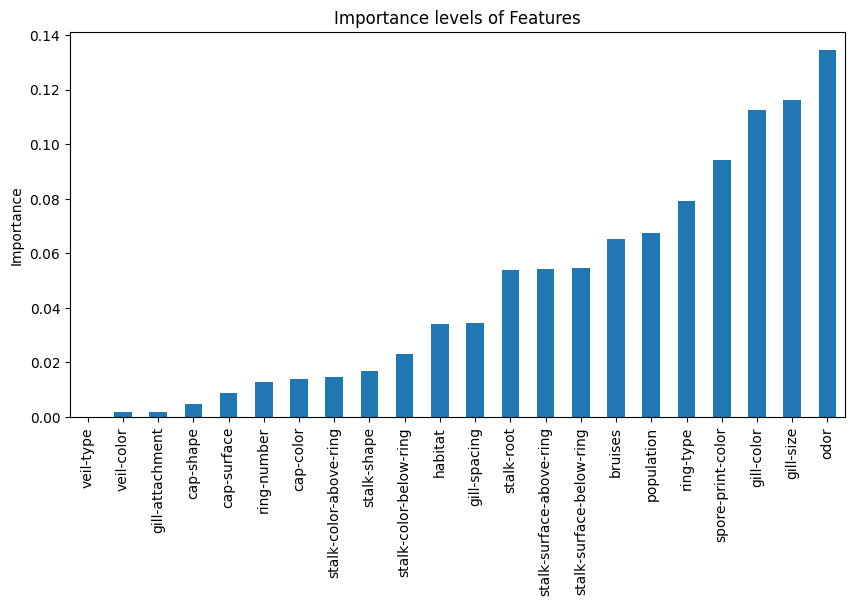

In [31]:
plt.figure(figsize=(10,5))
plt.title('Importance levels of Features')
plt.ylabel("Importance")
vip.plot(kind='bar')
plt.show()

In [32]:
features = ['odor', 'gill-size','spore-print-color','ring-type','gill-color','population','bruises']


x = df[features]
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)


scaler = StandardScaler()
scaler.fit(x_train)


x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)


In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)

y_pred = rf.predict(x_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)

y_pred2 = rf.predict(x_test_scaled)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [35]:
import pickle 

with open('shrooms_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('shrooms_model.pkl', 'wb') as f:
    pickle.dump(rf, f)
    
import json 
with open('shrooms_features.json', 'w') as f:
    json.dump(features, f)


In [36]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [37]:
print(df['odor'].unique())
print(df['gill-size'].unique())
print(df['spore-print-color'].unique())
print(df['ring-type'].unique())
print(df['gill-color'].unique())
print(df['population'].unique())
print(df['bruises'].unique())

[6 0 3 5 2 1 8 7 4]
[1 0]
[2 3 6 1 7 5 4 8 0]
[4 0 2 1 3]
[ 4  5  2  7 10  3  9  1  0  8 11  6]
[3 2 0 4 5 1]
[1 0]
